In [1]:
from astroquery.alma import Alma

In [2]:
alma = Alma()

In [3]:
alma.login('keflavich')

INFO: Authenticating keflavich on asa.alma.cl ... [astroquery.alma.core]
INFO: Authentication successful! [astroquery.alma.core]


In [4]:
#uid://A001/X1465/X2dfe

In [5]:
import os, shutil

In [6]:
tgtdir = '/orange/adamginsburg/salt/s255ir'
if not os.path.exists(tgtdir):
    os.mkdir(tgtdir)
alma.cache_location = tgtdir
os.chdir(tgtdir)

In [7]:
# alma.query({'project_code': '2019.1.00492.S'}, public=False)

In [8]:
alma.retrieve_data_from_uid('uid://A001/X1465/X2dfe')

INFO: Downloading files of size 91.225313762 Gbyte... [astroquery.alma.core]
INFO: Found cached file /orange/adamginsburg/salt/s255ir/member.uid___A001_X1465_X2dfe.README.txt with expected size 3554. [astroquery.query]
INFO: Found cached file /orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A001_X1465_X2dfe_001_of_001.tar with expected size 8389576704. [astroquery.query]
INFO: Found cached file /orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A001_X1465_X2dfe_auxiliary.tar with expected size 198432768. [astroquery.query]
INFO: Found cached file /orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A002_Xf0fd41_X5465.asdm.sdm.tar with expected size 82637300736. [astroquery.query]


['/orange/adamginsburg/salt/s255ir/member.uid___A001_X1465_X2dfe.README.txt',
 '/orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A001_X1465_X2dfe_001_of_001.tar',
 '/orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A001_X1465_X2dfe_auxiliary.tar',
 '/orange/adamginsburg/salt/s255ir/2019.1.00492.S_uid___A002_Xf0fd41_X5465.asdm.sdm.tar']

In [9]:
import glob, tarfile

for fn in glob.glob("*.tar"):
    with tarfile.TarFile.open(fn) as tf:
        tf.extractall()

In [10]:
os.getcwd()

'/orange/adamginsburg/salt/s255ir'

In [42]:
%matplotlib inline
import pylab as pl
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()
pl.rcParams['figure.facecolor'] = 'w'

In [12]:
from astropy.table import Table
from astropy import table

In [13]:
import pprint

In [14]:
import scipy, scipy.ndimage

In [15]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

Model is linear in parameters; consider using linear fitting methods.
Model is linear in parameters; consider using linear fitting methods.


In [16]:
import regions
from astropy import units as u, coordinates
#reg = regions.Regions.read('IN_3.reg')
#regsm = regions.Regions.read('IN_3_sm.reg')
#regvsm = regions.Regions.read('verysmall.reg')
#regvvsm = regions.Regions.read('innerdiskbox.reg')

# Stack...

In [17]:
from spectral_cube.analysis_utilities import stack_cube

In [18]:
nacltables = salt_tables[3:5]
nacltables[0]

Iso,Ju,Jl,vu,vl,nuCalc,e_nuCalc,x_nuCalc,E_U,Aij,Freq,gu,gl,E_L,QNs,Species
,,,,,,,,K,1 / s,GHz,,,,,
str2,int16,int16,uint8,uint8,float64,float64,str9,float64,float32,float64,int16,int16,float64,str15,str24
35,1,0,8,8,12268.92600,0.002000,MHz,4019.50,7e-07,12.26893,48,16,4018.9111844187687,v=8-8 J=1-0,23Na-35Clv=8-8 J=1-0
35,1,0,7,7,12361.41100,0.001000,MHz,3534.10,7e-07,12.36141,48,16,3533.506745838812,v=7-7 J=1-0,23Na-35Clv=7-7 J=1-0
35,1,0,6,6,12454.51100,0.001000,MHz,3043.90,7e-07,12.45451,48,16,3043.302277743511,v=6-6 J=1-0,23Na-35Clv=6-6 J=1-0
35,1,0,5,5,12548.22800,0.000000,MHz,2548.90,7e-07,12.54823,48,16,2548.29778003688,v=5-5 J=1-0,23Na-35Clv=5-5 J=1-0
35,1,0,4,4,12642.56100,0.000000,MHz,2049.20,7e-07,12.64256,48,16,2048.593252766911,v=4-4 J=1-0,23Na-35Clv=4-4 J=1-0
35,1,0,3,3,12737.51100,0.000000,MHz,1544.50,7e-07,12.73751,48,16,1543.8886958856133,v=3-3 J=1-0,23Na-35Clv=3-3 J=1-0
35,1,0,2,2,12833.07700,0.000000,MHz,1034.90,7e-07,12.83308,48,16,1034.2841094409778,v=2-2 J=1-0,23Na-35Clv=2-2 J=1-0
35,1,0,1,1,12929.26100,0.000000,MHz,520.30,7e-07,12.92926,48,16,519.6794933370201,v=1-1 J=1-0,23Na-35Clv=1-1 J=1-0


In [19]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [20]:
flist = (glob.glob('imaging/*zoom*.image'))
flist

['imaging/S255IR-SMA1_sci.spw2.cube.I.zoom.manual.image',
 'imaging/S255IR-SMA1_sci.spw3.cube.I.zoom.manual.image',
 'imaging/S255IR-SMA1_sci.spw1.cube.I.zoom.manual.image',
 'imaging/S255IR-SMA1_sci.spw0.cube.I.zoom.manual.image']

In [21]:
filename2 = 'imaging/S255IR-SMA1_sci.spw2.cube.I.zoom.manual.image'
cube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[:,100:-100,100:-100]
ch3ohcube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=216.945559*u.GHz).spectral_slab(-10*u.km/u.s, 20*u.km/u.s)
ch3ohcube = ch3ohcube - ch3ohcube.median(axis=0)
ch3ohcube

divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component
This function (<function BaseSpectralCube._apply_everywhere at 0x2aaf1840a280>) requires loading the entire cube into memory and may therefore be slow.


DaskVaryingResolutionSpectralCube with shape=(23, 300, 300) and unit=Jy / beam and chunk size (13, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:     23  type_s: VRAD      unit_s: km / s  range:      -10.131 km / s:      19.556 km / s

In [22]:
ch3oh_mx = ch3ohcube.max(axis=0)
ch3ohmsk = ch3oh_mx > 0.006*ch3ohcube.unit

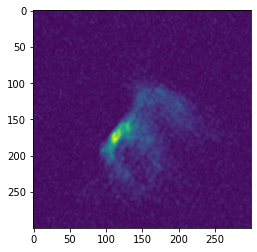

In [23]:
ch3oh_mx.quicklook()

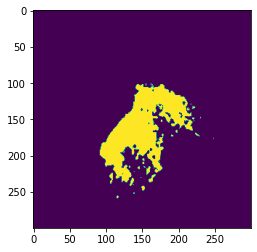

In [24]:
pl.imshow(ch3ohmsk)

In [ ]:
vmap = ch3ohcube.with_mask(ch3ohmsk).spectral_slab(-5*u.km/u.s, 13*u.km/u.s).moment1(axis=0).hdu

In [ ]:
pl.imshow(vmap.data)
pl.colorbar()

for fn in flist:
    for rr,regn in ((reg, 'IN3'),):
        outfile = fn.replace("_small",f"_{regn}_smaller")
        if not os.path.exists(outfile):
            cube = SpectralCube.read(fn).subcube_from_regions(rr)
            cube.allow_huge_operations=True
            cb = cube.beams.common_beam(max_iter=20, max_epsilon=0.01)
            scube = cube.convolve_to(cb)
            scube.write(outfile)

regn = "IN3"
cubes = [SpectralCube.read(fn).subcube_from_regions(reg)
         for fn in (glob.glob(f'NGC_6334_I_N.config8.spw[0-3].robust0.5.image_{regn}_smaller.fits'))]

cubes

In [25]:
cubes = [SpectralCube.read(fn, use_dask=True, format='casa_image')[:,100:-100,100:-100].with_mask(ch3ohmsk)
         for fn in flist]

divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component
divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component
divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component
divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component


In [26]:
cubes = [c - c.median(axis=0) for c in cubes]

In [27]:
# only needed for VRSCs
if hasattr(cubes[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubes])
    cb=beams.common_beam()

In [28]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [217.980231, 219.614936, 221.260147, 232.509977, 234.251912] GHz>,
 array(['23Na-35Clv=2-2 J=17-16', '23Na-35Clv=1-1 J=17-16',
        '23Na-35Clv=0-0 J=17-16', '23Na-35Clv=1-1 J=18-17',
        '23Na-35Clv=0-0 J=18-17'], dtype='<U24'))

In [29]:
from astropy import log
log.setLevel('INFO')

In [30]:
#log.setLevel('DEBUG')
vcen = 2 * u.km/u.s # from jet notebook
stack, cutouts = stack_cube(cubes,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stack.write('NaCl_v_le_3_stackcube.fits', overwrite=True)

Mean of empty slice


In [31]:
stackc = SpectralCube.read('NaCl_v_le_3_stackcube.fits')
stackc

SpectralCube with shape=(46, 300, 300) and unit=Jy / beam:
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:     46  type_s: VRAD      unit_s: m / s  range:   -28131.401 m / s:   32304.170 m / s

This function (<function BaseSpectralCube.max at 0x2aaf18408790>) requires loading the entire cube into memory and may therefore be slow.
All-NaN slice encountered
invalid value encountered in true_divide
This function (<function BaseSpectralCube.argmax_world at 0x2aaf18408ee0>) requires loading the entire cube into memory and may therefore be slow.
This function (<function BaseSpectralCube.argmax at 0x2aaf18408af0>) requires loading the entire cube into memory and may therefore be slow.


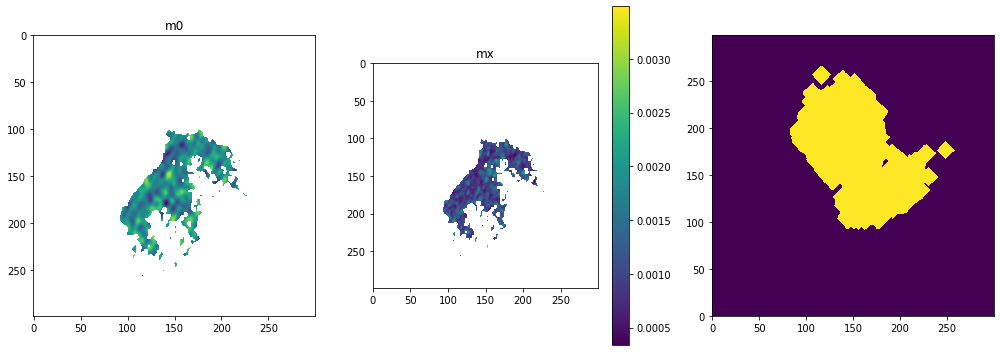

<Figure size 432x288 with 0 Axes>

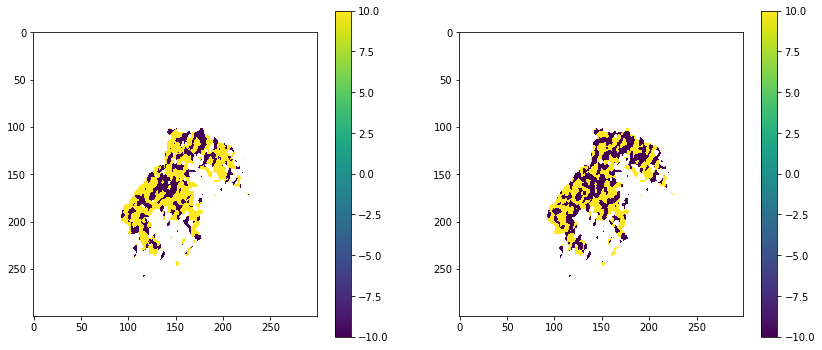

In [32]:
#stackc = stackc.subcube_from_regions(regsm)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = stackc.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = stackc.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.001*mx.unit
#msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=9)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = stackc.with_mask(msk).with_mask(stackc > 0.0005*stackc.unit).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=10)
pl.colorbar(mappable=im)
mxv = stackc.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=10)
pl.colorbar()


#vmap = m1.hdu

Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <0.01
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <0.01
This function (<function BaseSpectralCube.argmax_world at 0x2aaf18408ee0>) requires loading the entire cube into memory and may therefore be slow.


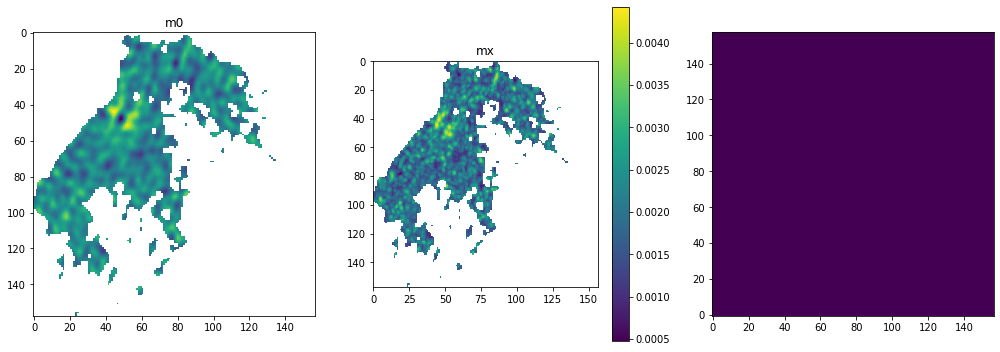

<Figure size 432x288 with 0 Axes>

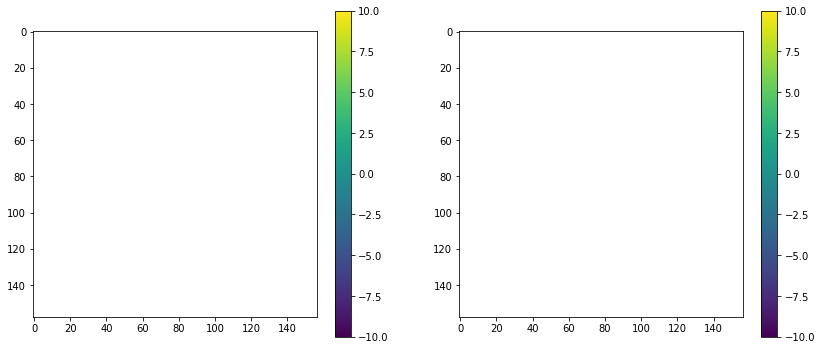

In [33]:
# try creating a vmap based on another line
restval = 232.6867*u.GHz # 'H2Ov2=1_5(5,0)-6(4,3)': 
cube = [c for c in cubes if (c.spectral_extrema[0] < restval) & (c.spectral_extrema[1] > restval)][0]
#scube = cube.subcube_from_regions(reg).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restval).spectral_slab(-20*u.km/u.s, 20*u.km/u.s)
scube = cube.minimal_subcube().with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restval).spectral_slab(-20*u.km/u.s, 20*u.km/u.s)

pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = scube.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = scube.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.0075*mx.unit
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=5)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = scube.with_mask(msk).with_mask(scube > 0.0005*stackc.unit).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=10)
pl.colorbar(mappable=im)
mxv = scube.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=10)
pl.colorbar()


#vmap = m1.hdu
# the rest value selected above was just the line center; we need to assume it's really 32 km/s off
#vmap.data = vmap.data

In [34]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
from overplot_saltlines import overplot_saltlines

In [35]:
spectra = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    #sp = cube.subcube_from_regions(reg).mean(axis=(1,2))
    sp = cube.mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra.append(pysp)
    pysp.specname = f'spw{ii+1}'

In [36]:
mkdir -p spectra/figures

spw1
spw2
spw3
spw4


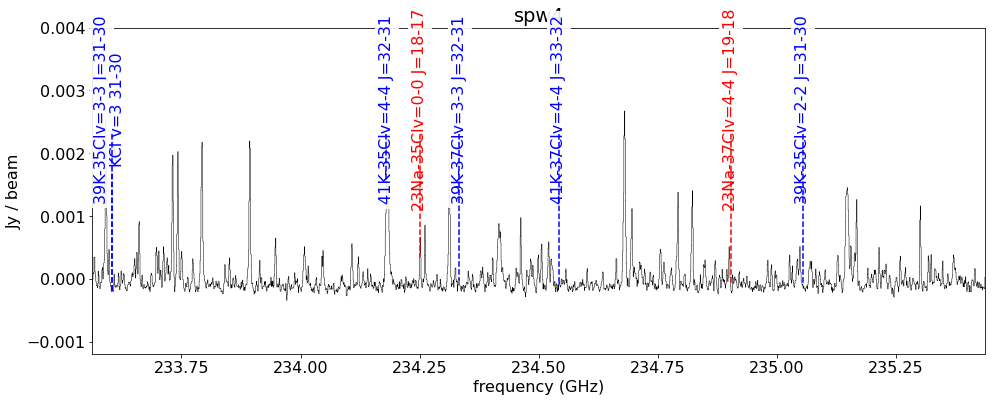

In [37]:
overplot_saltlines(spectra, vcen=vcen, savepath='spectra/figures')

In [38]:
ls spectra/figures

color_labels_spw1.png  color_labels_spw3.png  spw1.png  spw3.png
color_labels_spw2.png  color_labels_spw4.png  spw2.png  spw4.png


In [39]:
from IPython.display import Image,display

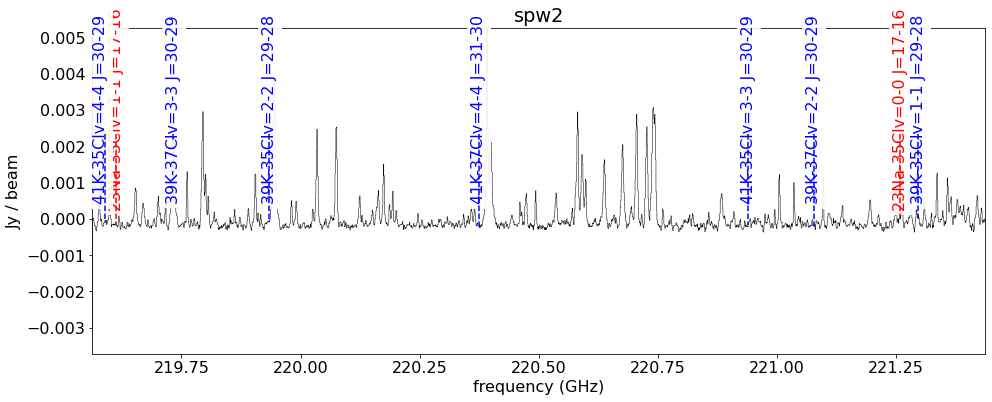

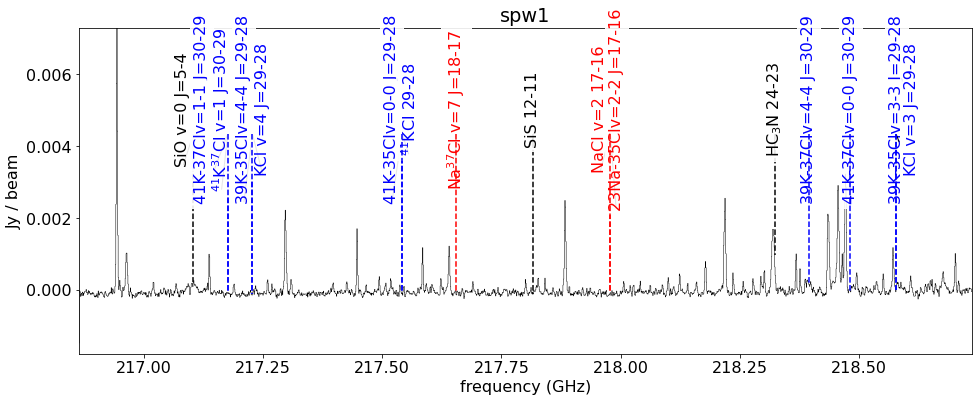

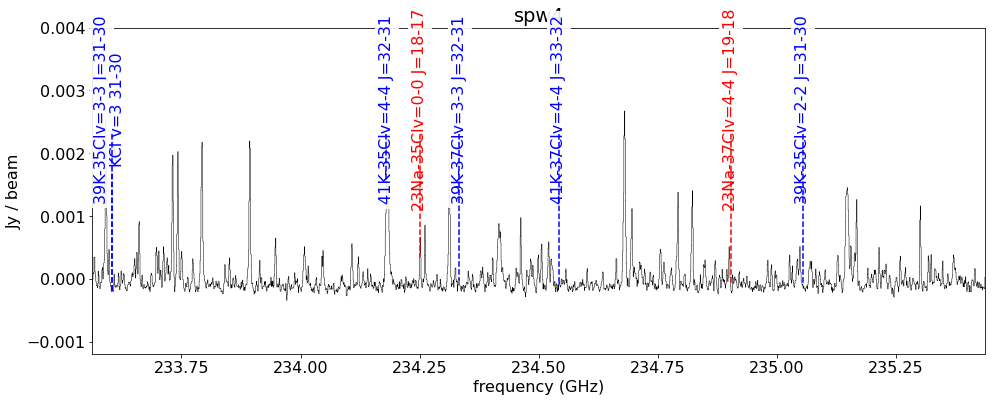

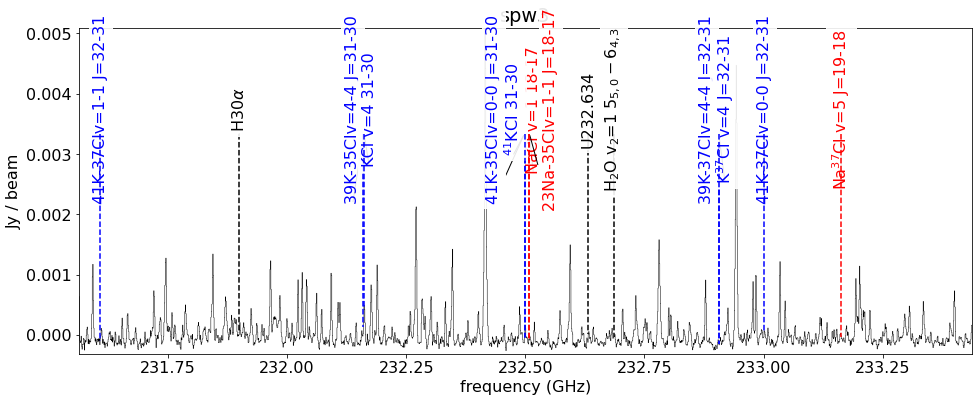

In [40]:
for fn in glob.glob('spectra/figures/color*png'):
    display(Image(fn))

In [ ]:
import glob
import spectral_cube.analysis_utilities
import reproject
from tqdm.notebook import tqdm

cbflist = (glob.glob('imaging/*zoom*.image'))
for fn in cbflist:
    basename = os.path.split(fn)[-1].split(".image")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True, format='casa_image')[:,100:-100,100:-100]
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    #scube = cube.subcube_from_regions(reg)
    scube = cube.with_mask(ch3ohmsk).minimal_subcube()
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    print("Mean spectrum")
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".image","_meanspec.fits")}', overwrite=True)


    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)

    # convert to km/s with arbitrary rest value so 0 km/s can be interpreted
    if scube.spectral_axis.unit.is_equivalent(u.Hz):
        scube = scube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=scube.spectral_axis.mean())

    print("Stacking")
    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s,
                                                           #progressbar=tqdm,
                                                           #num_cores=8
                                                          )
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/{basename}_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component


DaskVaryingResolutionSpectralCube with shape=(1920, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 216863051761.207 Hz:218736973687.894 Hz
Mean spectrum
Stacking


In [ ]:
ls spectra

In [ ]:
stackspectra = []
for ii,fn in enumerate(glob.glob('spectra/*_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split(".")
    pysp.specname = f'{spl[0]}_{spl[2]}_stack'
    stackspectra.append(pysp)

In [ ]:
overplot_saltlines(stackspectra, vcen=vcen, savepath='spectra/figures')

In [ ]:
ls spectra/figures/

In [ ]:
for fn in glob.glob('spectra/figures/color*stack.png'):
    display(Image(fn))